<a href="https://colab.research.google.com/github/chouhandiksha/bigdataproject/blob/main/notebooks/Analysis%20NY%20Compare%202019%20with%202020%20Social%20Distancing%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NY Compare 2019 with 2020 Social Distancing

**Instructions:**

1. Execute the first code cell.
2. There will be a link to follow in order to authorize the google account for drive. Go to that link.
3. A code to authorize the google account will be generated. Copy the code generated.
4. Go back to the cell where the process of mounting the drive is running. Paste the generated code from step 3 to the text box in the cell and press enter.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from pathlib import Path

city = 'NY'
city_directory = 'ny'
year = '2020'

# Provide a list of CSV file paths to read
path = Path('drive/MyDrive/big-data-project/data/clean-data/')
path_list = [path/city_directory/'social'/year]

In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0MB 8.5MB/s 
     |████████████████████████████████| 15.3MB 27.2MB/s 
     |████████████████████████████████| 6.5MB 33.4MB/s 


In [ ]:
pip install geoplot

     |████████████████████████████████| 14.4MB 193kB/s 
     |████████████████████████████████| 19.1MB 1.2MB/s 
     |████████████████████████████████| 225kB 52.0MB/s 
  Created wheel for cartopy: filename=Cartopy-0.18.0-cp37-cp37m-linux_x86_64.whl size=15127649 sha256=e6a4b5722c5f92d2262f1a3acdc78db24312ce25ed5fa0ad5409c7c8c2a69b88
  Stored in directory: /root/.cache/pip/wheels/8d/f8/da/2c05136f2162370d2baec85bfbbf91d7729ab9e248da878acd
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=367b92808bc90aa022640a1ee992899743da6de3a520481914fc7e605b6d2c46
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built cartopy pyshp


In [ ]:
import os
import geopandas
import geoplot
import mapclassify
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange

import altair as alt
from vega_datasets import data

# # Allow altair to visualize large datasets
# alt.data_transformers.disable_max_rows()

Mounted at /content/drive


In [ ]:
# # Chicago Counties
# fips_ch = ['17031','17037','17043','17063','17091','17089','17093','17111','17197','17097','18073','18089','18111','18127','55059']

# # New York Counties
# fips_ny = ['36061','36047','36005','36085','36081']

# # LA Counties
# fips_la = ['06037','06059']

# path = Path('/Users/justinsnider/nyu-big-data/project/clean-data/')
# dir_list_la = [path/'la'/'social'/'2019',
#                path/'la'/'social'/'2020']

# dir_list_ny = [path/'ny'/'social'/'2019',
#                path/'ny'/'social'/'2020']

# dir_list_ch = [path/'ch'/'social'/'2019',
#                path/'ch'/'social'/'2020']

# dir_list = [path/'la'/'social'/'2019',
#             path/'la'/'social'/'2020',
#             path/'ny'/'social'/'2019',
#             path/'ny'/'social'/'2020',
#             path/'ch'/'social'/'2019',
#             path/'ch'/'social'/'2020']

In [ ]:
#Appending into dataframe

def get_df(path_list):
    df = []
    first = True
    for directory in tqdm(path_list, desc='Years'):
        f_list = os.listdir(directory)
        csv_files = [directory/f for f in f_list if f.endswith('.csv')]
        for csv in tqdm(csv_files, desc='Days'):
            if first:
                df = pd.read_csv(csv, dtype={'cbg': object})
                first = False
            else:
                df = df.append(pd.read_csv(csv, dtype={'cbg': object}), ignore_index=True)
    return df.sort_values(by=['date_range_start'])

In [ ]:
%%time

df = get_df(path_list)



CPU times: user 7min 46s, sys: 9.22 s, total: 7min 55s
Wall time: 15min


In [ ]:
df

,Unnamed: 0,cbg,date_range_start,date_range_end,device_count,distance_traveled_from_home,bucketed_distance_traveled,median_dwell_at_bucketed_distance_traveled,completely_home_device_count,median_home_dwell_time,bucketed_home_dwell_time,at_home_by_each_hour,part_time_work_behavior_devices,full_time_work_behavior_devices,destination_cbgs,delivery_behavior_devices,median_non_home_dwell_time,candidate_device_count,bucketed_away_from_home_time,median_percentage_time_home,bucketed_percentage_time_home,mean_home_dwell_time,mean_non_home_dwell_time,mean_distance_traveled_from_home
1847850,59305,360810361001,2020-01-01T00:00:00-05:00,2020-01-02T00:00:00-05:00,105,3069.0,"{""16001-50000"":2,""0"":36,"">50000"":3,""2001-8000""...","{""16001-50000"":97,"">50000"":47,""<1000"":145,""200...",35,384,"{""721-1080"":3,""361-720"":10,""61-360"":10,""<60"":3...","[30,31,40,42,48,48,40,48,51,47,45,45,47,44,39,...",2,1,"{""360810329002"":1,""360810427002"":1,""3608701270...",1,65,183,"{""21-45"":3,""481-540"":2,""46-60"":1,""1201-1320"":3...",84,"{""26-50"":1,""51-75"":7,""0-25"":33,"">100"":1,""76-10...",NaN,NaN,NaN
1850452,148260,360050227021,2020-01-01T00:00:00-05:00,2020-01-02T00:00:00-05:00,74,6196.0,"{""16001-50000"":8,""0"":26,"">50000"":4,""2001-8000""...","{""16001-50000"":49,"">50000"":489,""<1000"":126,""20...",29,758,"{""721-1080"":11,""361-720"":4,""61-360"":14,""<60"":2...","[35,34,39,34,36,40,40,42,40,40,40,40,40,38,35,...",1,1,"{""340130041002"":1,""360610139003"":1,""3600502090...",1,18,165,"{""21-45"":1,""481-540"":1,""541-600"":2,""46-60"":2,""...",94,"{""26-50"":1,""51-75"":11,""0-25"":16,"">100"":1,""76-1...",NaN,NaN,NaN
1850451,148066,360811010012,2020-01-01T00:00:00-05:00,2020-01-02T00:00:00-05:00,201,2018.0,"{""16001-50000"":26,""0"":86,"">50000"":6,""2001-8000...","{""16001-50000"":51,"">50000"":276,""<1000"":39,""200...",87,140,"{""721-1080"":30,""361-720"":22,""61-360"":27,""<60"":...","[67,66,63,67,68,68,75,82,73,74,76,70,69,73,67,...",2,3,"{""360810934020"":1,""360810062025"":1,""3608100860...",1,13,533,"{""21-45"":20,""481-540"":2,""541-600"":9,""46-60"":6,...",95,"{""26-50"":8,""51-75"":8,""0-25"":64,"">100"":3,""76-10...",NaN,NaN,NaN
1850450,148065,360810667011,2020-01-01T00:00:00-05:00,2020-01-02T00:00:00-05:00,81,2498.0,"{""16001-50000"":5,""0"":22,"">50000"":2,""2001-8000""...","{""16001-50000"":40,"">50000"":245,""<1000"":93,""200...",24,1011,"{""721-1080"":16,""361-720"":11,""61-360"":9,""<60"":1...","[31,33,41,42,41,42,47,50,51,53,52,51,54,50,50,...",2,1,"{""360810208001"":1,""360810515001"":1,""3608105210...",1,65,143,"{""21-45"":5,""721-840"":1,""301-360"":1,""<20"":33,""6...",92,"{""26-50"":2,""51-75"":4,""0-25"":10,"">100"":3,""76-10...",NaN,NaN,NaN
1850449,148061,360610263004,2020-01-01T00:00:00-05:00,2020-01-02T00:00:00-05:00,61,4793.0,"{""16001-50000"":1,""0"":23,"">50000"":1,""2001-8000""...","{""16001-50000"":777,"">50000"":314,""<1000"":202,""2...",21,635,"{""721-1080"":5,""361-720"":7,""61-360"":5,""<60"":17,...","[26,25,27,27,29,29,28,28,26,29,34,31,33,30,31,...",1,1,"{""360610265002"":2,""120950147041"":1,""3600502470...",1,34,142,"{""21-45"":6,""481-540"":1,""721-840"":3,""301-360"":2...",89,"{""26-50"":3,""51-75"":2,""0-25"":17,"">100"":7,""76-10...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211312,76456,360810457001,2020-12-31T00:00:00-05:00,2021-01-01T00:00:00-05:00,61,2637.0,"{""16001-50000"":4,""0"":24,"">50000"":4,""2001-8000""...","{""16001-50000"":53,"">50000"":24,""<1000"":170,""200...",24,826,"{""721-1080"":21,""361-720"":6,""61-360"":4,""<60"":8,...","[48,48,47,47,48,50,39,44,40,38,35,31,33,25,26,...",6,3,"{""360810992002"":1,""360810086001"":1,""3608107130...",2,42,116,"{""21-45"":5,""481-540"":2,""541-600"":1,""721-840"":1...",94,"{""0-25"":6,""76-100"":40,""51-75"":11,""26-50"":3}",863.0,181.0,7071.0
2211311,76454,360471014001,2020-12-31T00:00:00-05:00,2021-01-01T00:00:00-05:00,38,330.0,"{""0"":16,"">50000"":1,""

In [ ]:
[print(c) for c in df.columns];

Unnamed: 0
cbg
date_range_start
date_range_end
device_count
distance_traveled_from_home
bucketed_distance_traveled
median_dwell_at_bucketed_distance_traveled
completely_home_device_count
median_home_dwell_time
bucketed_home_dwell_time
at_home_by_each_hour
part_time_work_behavior_devices
full_time_work_behavior_devices
destination_cbgs
delivery_behavior_devices
median_non_home_dwell_time
candidate_device_count
bucketed_away_from_home_time
median_percentage_time_home
bucketed_percentage_time_home
mean_home_dwell_time
mean_non_home_dwell_time
mean_distance_traveled_from_home


In [ ]:
# Selecting the columsn that we need for the analysis
# col = ['date_range_start',
#        'cbg',
#        'device_count',  # Total active devices
#        'completely_home_device_count',
#        'part_time_work_behavior_devices',
#        'full_time_work_behavior_devices',
#        'delivery_behavior_devices',
#        'median_percentage_time_home',
#        'median_home_dwell_time',
#        'mean_home_dwell_time',
#        'median_non_home_dwell_time',
#        'mean_non_home_dwell_time',
#        'distance_traveled_from_home', # Median Distance traveled
#        'mean_distance_traveled_from_home']
col = ['date_range_start',
       'cbg',
       'device_count',  # Total active devices
       'completely_home_device_count',
       'part_time_work_behavior_devices',
       'full_time_work_behavior_devices']
devices_mobility = df[col]

In [ ]:
#Renaming columns

devices_mobility = devices_mobility.rename(columns={'date_range_start':'date','device_count':'total', 'completely_home_device_count':'completely_home','part_time_work_behavior_devices':'part_time_work', 'full_time_work_behavior_devices':'full_time_work'})
devices_mobility

,date,cbg,total,completely_home,part_time_work,full_time_work
1847850,2020-01-01T00:00:00-05:00,360810361001,105,35,2,1
1850452,2020-01-01T00:00:00-05:00,360050227021,74,29,1,1
1850451,2020-01-01T00:00:00-05:00,360811010012,201,87,2,3
1850450,2020-01-01T00:00:00-05:00,360810667011,81,24,2,1
1850449,2020-01-01T00:00:00-05:00,360610263004,61,21,1,1
...,...,...,...,...,...,...
2211312,2020-12-31T00:00:00-05:00,360810457001,61,24,6,3
2211311,2020-12-31T00:00:00-05:00,360471014001,38,17,1,1
2211310,2020-12-31T00:00:00-05:00,360470352001,36,14,1,1
2211308,2020-12-31T00:00:00-05:00,360810972021,114,55,1,1


In [ ]:
# devices_mobility

In [ ]:
#Listing out the device count columns

device_columns = ['completely_home','part_time_work','full_time_work']

In [ ]:
#Calculating percentage for all the device columns
for column in device_columns :
    devices_mobility['percentage_'+column]= devices_mobility.apply(lambda row: row[column]/row['total']*100.0 if row['total']!=0.0 else 0.0, axis=1)
devices_mobility

,date,cbg,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work
1847850,2020-01-01T00:00:00-05:00,360810361001,105,35,2,1,33.333333,1.904762,0.952381
1850452,2020-01-01T00:00:00-05:00,360050227021,74,29,1,1,39.189189,1.351351,1.351351
1850451,2020-01-01T00:00:00-05:00,360811010012,201,87,2,3,43.283582,0.995025,1.492537
1850450,2020-01-01T00:00:00-05:00,360810667011,81,24,2,1,29.629630,2.469136,1.234568
1850449,2020-01-01T00:00:00-05:00,360610263004,61,21,1,1,34.426230,1.639344,1.639344
...,...,...,...,...,...,...,...,...,...
2211312,2020-12-31T00:00:00-05:00,360810457001,61,24,6,3,39.344262,9.836066,4.918033
2211311,2020-12-31T00:00:00-05:00,360471014001,38,17,1,1,44.736842,2.631579,2.631579
2211310,2020-12-31T00:00:00-05:00,360470352001,36,14,1,1,38.888889,2.777778,2.777778
2211308,2020-12-31T00:00:00-05:00,360810972021,114,55,1,1,48.245614,0.877193,0.877193


In [ ]:
#Normalising the percentage columns

for column in device_columns:
        devices_mobility['norm_'+column] = (devices_mobility['percentage_'+ column] - devices_mobility['percentage_'+column].mean()) / devices_mobility['percentage_'+column].std()

devices_mobility

,date,cbg,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work
1847850,2020-01-01T00:00:00-05:00,360810361001,105,35,2,1,33.333333,1.904762,0.952381,-0.333820,-0.903751,-0.982197
1850452,2020-01-01T00:00:00-05:00,360050227021,74,29,1,1,39.189189,1.351351,1.351351,0.078979,-1.018687,-0.889712
1850451,2020-01-01T00:00:00-05:00,360811010012,201,87,2,3,43.283582,0.995025,1.492537,0.367607,-1.092691,-0.856984
1850450,2020-01-01T00:00:00-05:00,360810667011,81,24,2,1,29.629630,2.469136,1.234568,-0.594907,-0.786538,-0.916783
1850449,2020-01-01T00:00:00-05:00,360610263004,61,21,1,1,34.426230,1.639344,1.639344,-0.256778,-0.958875,-0.822952
...,...,...,...,...,...,...,...,...,...,...,...,...
2211312,2020-12-31T00:00:00-05:00,360810457001,61,24,6,3,39.344262,9.836066,4.918033,0.089911,0.743473,-0.062923
2211311,2020-12-31T00:00:00-05:00,360471014001,38,17,1,1,44.736842,2.631579,2.631579,0.470053,-0.752801,-0.592943
2211310,2020-12-31T00:00:00-05:00,360470352001,36,14,1,1,38.888889,2.777778,2.777778,0.057810,-0.722437,-0.559053
2211308,2020-12-31T00:00:00-05:00,360810972021,114,55,1,1,48.245614,0.877193,0.877193,0.717398,-1.117163,-0.999626


In [ ]:
#Converting datetime format
devices_mobility['date'] = pd.to_datetime(devices_mobility['date'],utc= True)
devices_mobility

,date,cbg,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work
1847850,2020-01-01 05:00:00+00:00,360810361001,105,35,2,1,33.333333,1.904762,0.952381,-0.333820,-0.903751,-0.982197
1850452,2020-01-01 05:00:00+00:00,360050227021,74,29,1,1,39.189189,1.351351,1.351351,0.078979,-1.018687,-0.889712
1850451,2020-01-01 05:00:00+00:00,360811010012,201,87,2,3,43.283582,0.995025,1.492537,0.367607,-1.092691,-0.856984
1850450,2020-01-01 05:00:00+00:00,360810667011,81,24,2,1,29.629630,2.469136,1.234568,-0.594907,-0.786538,-0.916783
1850449,2020-01-01 05:00:00+00:00,360610263004,61,21,1,1,34.426230,1.639344,1.639344,-0.256778,-0.958875,-0.822952
...,...,...,...,...,...,...,...,...,...,...,...,...
2211312,2020-12-31 05:00:00+00:00,360810457001,61,24,6,3,39.344262,9.836066,4.918033,0.089911,0.743473,-0.062923
2211311,2020-12-31 05:00:00+00:00,360471014001,38,17,1,1,44.736842,2.631579,2.631579,0.470053,-0.752801,-0.592943
2211310,2020-12-31 05:00:00+00:00,360470352001,36,14,1,1,38.888889,2.777778,2.777778,0.057810,-0.722437,-0.559053
2211308,2020-12-31 05:00:00+00:00,360810972021,114,55,1,1,48.245614,0.877193,0.877193,0.717398,-1.117163,-0.999626


In [ ]:
# Normalize time
devices_mobility['date'] = devices_mobility['date'].dt.normalize()
devices_mobility

,date,cbg,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work
1847850,2020-01-01 00:00:00+00:00,360810361001,105,35,2,1,33.333333,1.904762,0.952381,-0.333820,-0.903751,-0.982197
1850452,2020-01-01 00:00:00+00:00,360050227021,74,29,1,1,39.189189,1.351351,1.351351,0.078979,-1.018687,-0.889712
1850451,2020-01-01 00:00:00+00:00,360811010012,201,87,2,3,43.283582,0.995025,1.492537,0.367607,-1.092691,-0.856984
1850450,2020-01-01 00:00:00+00:00,360810667011,81,24,2,1,29.629630,2.469136,1.234568,-0.594907,-0.786538,-0.916783
1850449,2020-01-01 00:00:00+00:00,360610263004,61,21,1,1,34.426230,1.639344,1.639344,-0.256778,-0.958875,-0.822952
...,...,...,...,...,...,...,...,...,...,...,...,...
2211312,2020-12-31 00:00:00+00:00,360810457001,61,24,6,3,39.344262,9.836066,4.918033,0.089911,0.743473,-0.062923
2211311,2020-12-31 00:00:00+00:00,360471014001,38,17,1,1,44.736842,2.631579,2.631579,0.470053,-0.752801,-0.592943
2211310,2020-12-31 00:00:00+00:00,360470352001,36,14,1,1,38.888889,2.777778,2.777778,0.057810,-0.722437,-0.559053
2211308,2020-12-31 00:00:00+00:00,360810972021,114,55,1,1,48.245614,0.877193,0.877193,0.717398,-1.117163,-0.999626


In [ ]:
# Check the number of rows for each CBG
print('Min: {}\nMax: {}'.format(min(set(devices_mobility.groupby('cbg').count()['date'])), max(set(devices_mobility.groupby('cbg').count()['date']))))

Min: 1
Max: 366


In [ ]:
for col in devices_mobility.columns:
    print('\n')
    print(col)
#     if devices_mobility[col].dtype
#     print(devices_mobility[col].dtype)
    print('Min: {}\nMax: {}'.format(devices_mobility[col].min(), devices_mobility[col].max()))



date
Min: 2020-01-01 00:00:00+00:00
Max: 2020-12-31 00:00:00+00:00


cbg
Min: 360050001001
Max: 360859901000


total
Min: 5
Max: 12047


completely_home
Min: 1
Max: 6564


part_time_work
Min: 1
Max: 1675


full_time_work
Min: 1
Max: 387


percentage_completely_home
Min: 0.4098360655737705
Max: 94.44444444444444


percentage_part_time_work
Min: 0.10559662090813093
Max: 66.66666666666666


percentage_full_time_work
Min: 0.05678591709256105
Max: 53.84615384615385


norm_completely_home
Min: -2.6547110942593712
Max: 3.9741129867470444


norm_part_time_work
Min: -1.2774130697364041
Max: 12.546417085216044


norm_full_time_work
Min: -1.1898037765546834
Max: 11.279059114325067


In [ ]:
# Print all Null and NaN values
print('We have {} null values.'.format(len(devices_mobility[devices_mobility.isna().any(axis=1)])))

We have 0 null values.


In [ ]:
# Grouping based on day
grouped_dm = devices_mobility.groupby(devices_mobility['date']).mean()
grouped_dm

,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work
date,,,,,,,,,,
2020-01-01 00:00:00+00:00,63.947108,22.696511,2.041102,1.285487,34.331163,3.650978,2.582719,-0.263480,-0.541085,-0.604270
2020-01-02 00:00:00+00:00,62.679841,17.663586,5.937530,5.262151,27.482716,9.418901,8.447394,-0.746250,0.656834,0.755215
2020-01-03 00:00:00+00:00,62.834981,17.845982,6.197226,5.092793,27.976160,9.903114,8.142616,-0.711466,0.757398,0.684565
2020-01-04 00:00:00+00:00,62.050750,21.446537,2.992020,1.689275,33.942585,5.117607,3.271717,-0.290872,-0.236487,-0.444554
2020-01-05 00:00:00+00:00,62.661404,23.729665,2.929346,1.474482,37.064090,4.989433,2.923406,-0.070826,-0.263107,-0.525295
...,...,...,...,...,...,...,...,...,...,...
2020-12-27 00:00:00+00:00,47.963688,19.315974,1.951585,1.325530,37.910624,4.878801,3.900465,-0.011151,-0.286083,-0.298804
2020-12-28 00:00:00+00:00,47.990602,18.083466,2.728576,2.223320,35.553871,6.652046,5.857633,-0.177287,0.082196,0.154885
2020-12-29 00:00:00+00:00,48.470279,17.939283,2.529084,1.965737,34.662580,5.831772,4.999802,-0.240117,-0.088164,-0.043968


In [ ]:
grouped_dm.reset_index()

,date,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work
0,2020-01-01 00:00:00+00:00,63.947108,22.696511,2.041102,1.285487,34.331163,3.650978,2.582719,-0.263480,-0.541085,-0.604270
1,2020-01-02 00:00:00+00:00,62.679841,17.663586,5.937530,5.262151,27.482716,9.418901,8.447394,-0.746250,0.656834,0.755215
2,2020-01-03 00:00:00+00:00,62.834981,17.845982,6.197226,5.092793,27.976160,9.903114,8.142616,-0.711466,0.757398,0.684565
3,2020-01-04 00:00:00+00:00,62.050750,21.446537,2.992020,1.689275,33.942585,5.117607,3.271717,-0.290872,-0.236487,-0.444554
4,2020-01-05 00:00:00+00:00,62.661404,23.729665,2.929346,1.474482,37.064090,4.989433,2.923406,-0.070826,-0.263107,-0.525295
...,...,...,...,...,...,...,...,...,...,...,...
361,2020-12-27 00:00:00+00:00,47.963688,19.315974,1.951585,1.325530,37.910624,4.878801,3.900465,-0.011151,-0.286083,-0.298804
362,2020-12-28 00:00:00+00:00,47.990602,18.083466,2.728576,2.223320,35.553871,6.652046,5.857633,-0.177287,0.082196,0.154885
363,2020-12-29 00:00:00+00:00,48.470279,17.939283,2.529084,1.965737,34.662580,5.831772,4.999802,-0.240117,-0.088164,-0.043968
364,2020-12-30 00:00:00+00:00,48.406882,17.282141,2.510116,1.937072,33.070879,5.850389,4.963771,-0.352321,-0.084298,-0.052320


In [ ]:
#Visualising mobility

title = '{} {}'.format(city,year)
alt.Chart(grouped_dm.reset_index()).mark_line().encode(
    x=alt.X('date', title='Date'),
    y=alt.Y(alt.repeat('row'), type='quantitative')
).properties(
    width=300,
    height=250
).repeat(
    row=['percentage_completely_home','percentage_part_time_work','percentage_full_time_work']
).interactive()

alt.RepeatChart(...)

![ch-daily-2020](https://github.com/chouhandiksha/bigdataproject/raw/main/media/social-dist/ch-daily-2020.png)

In [ ]:
#Adding month column for further usage
devices_mobility['month'] = devices_mobility['date'].dt.month
devices_mobility

,date,cbg,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,month
1847850,2020-01-01 00:00:00+00:00,360810361001,105,35,2,1,33.333333,1.904762,0.952381,-0.333820,-0.903751,-0.982197,1
1850452,2020-01-01 00:00:00+00:00,360050227021,74,29,1,1,39.189189,1.351351,1.351351,0.078979,-1.018687,-0.889712,1
1850451,2020-01-01 00:00:00+00:00,360811010012,201,87,2,3,43.283582,0.995025,1.492537,0.367607,-1.092691,-0.856984,1
1850450,2020-01-01 00:00:00+00:00,360810667011,81,24,2,1,29.629630,2.469136,1.234568,-0.594907,-0.786538,-0.916783,1
1850449,2020-01-01 00:00:00+00:00,360610263004,61,21,1,1,34.426230,1.639344,1.639344,-0.256778,-0.958875,-0.822952,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211312,2020-12-31 00:00:00+00:00,360810457001,61,24,6,3,39.344262,9.836066,4.918033,0.089911,0.743473,-0.062923,12
2211311,2020-12-31 00:00:00+00:00,360471014001,38,17,1,1,44.736842,2.631579,2.631579,0.470053,-0.752801,-0.592943,12
2211310,2020-12-31 00:00:00+00:00,360470352001,36,14,1,1,38.888889,2.777778,2.777778,0.057810,-0.722437,-0.559053,12
2211308,2020-12-31 00:00:00+00:00,360810972021,114,55,1,1,48.245614,0.877193,0.877193,0.717398,-1.117163,-0.999626,12


In [ ]:
#Grouping data on basis of month value

grouped_dm = devices_mobility.groupby([devices_mobility['month']]).mean()
grouped_dm

,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work
month,,,,,,,,,,
1,56.747442,15.731918,5.235401,4.372121,27.152249,9.372379,7.942775,-0.769546,0.647172,0.638240
2,60.324868,16.804988,5.292050,4.085750,27.244239,8.859695,6.987120,-0.763061,0.540694,0.416710
3,57.413595,21.522013,3.796671,3.051230,38.200698,6.793587,5.693950,0.009297,0.111592,0.116942
4,53.385405,29.499757,1.776196,1.560461,54.043534,4.047668,3.708108,1.126113,-0.458698,-0.343394
5,55.731906,28.235325,1.977632,1.620823,49.802733,4.288053,3.745494,0.827165,-0.408774,-0.334728
6,54.955332,23.980395,2.416256,1.845153,42.533010,5.061646,4.173453,0.314697,-0.248109,-0.235523
7,53.642778,21.457478,2.609792,1.925425,38.356485,5.569414,4.469662,0.020279,-0.142652,-0.166859
8,56.267639,22.633664,2.698432,1.951091,35.769230,5.844539,4.651017,-0.162105,-0.085513,-0.124819
9,52.261083,18.865013,2.888580,2.195664,35.339143,6.287344,5.160846,-0.192424,0.006452,-0.006637


In [ ]:
d = []
for col in ['percentage_completely_home','percentage_part_time_work','percentage_full_time_work']:
        for m in range(1,13):
            d.append({'month': m, 'column': col, 'value': grouped_dm[col][m]})
d = alt.Data(values=d)

In [ ]:
title = '{} {}'.format(city,year)
alt.Chart(d, title=title).mark_line().encode(
    x=alt.X('month:O', title='Month'),
    y=alt.Y('value:Q', type='quantitative', title='Percentage'),
    color='column:N'
).properties(
    width=300,
    height=250
).interactive()

alt.Chart(...)

![ch-monthly-2020](https://github.com/chouhandiksha/bigdataproject/raw/main/media/social-dist/ch-monthly-2020.png)

In [ ]:
grouped_daily = devices_mobility.groupby([devices_mobility['date']]).mean()
grouped_daily

,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,month
date,,,,,,,,,,,
2020-01-01 00:00:00+00:00,63.947108,22.696511,2.041102,1.285487,34.331163,3.650978,2.582719,-0.263480,-0.541085,-0.604270,1.0
2020-01-02 00:00:00+00:00,62.679841,17.663586,5.937530,5.262151,27.482716,9.418901,8.447394,-0.746250,0.656834,0.755215,1.0
2020-01-03 00:00:00+00:00,62.834981,17.845982,6.197226,5.092793,27.976160,9.903114,8.142616,-0.711466,0.757398,0.684565,1.0
2020-01-04 00:00:00+00:00,62.050750,21.446537,2.992020,1.689275,33.942585,5.117607,3.271717,-0.290872,-0.236487,-0.444554,1.0
2020-01-05 00:00:00+00:00,62.661404,23.729665,2.929346,1.474482,37.064090,4.989433,2.923406,-0.070826,-0.263107,-0.525295,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27 00:00:00+00:00,47.963688,19.315974,1.951585,1.325530,37.910624,4.878801,3.900465,-0.011151,-0.286083,-0.298804,12.0
2020-12-28 00:00:00+00:00,47.990602,18.083466,2.728576,2.223320,35.553871,6.652046,5.857633,-0.177287,0.082196,0.154885,12.0
2020-12-29 00:00:00+00:00,48.470279,17.939283,2.529084,1.965737,34.662580,5.831772,4.999802,-0.240117,-0.088164,-0.043968,12.0


In [ ]:
#Visualising mobility

title = '{} {}'.format(city,year)
alt.Chart(grouped_daily.reset_index()).mark_line().encode(
    x=alt.X('date', title='Date'),
    y=alt.Y(alt.repeat('row'), type='quantitative')
).properties(
    width=300,
    height=250
).repeat(
    row=['percentage_completely_home','percentage_part_time_work','percentage_full_time_work']
).interactive()

alt.RepeatChart(...)

In [ ]:
grouped_daily

,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,month
date,,,,,,,,,,,
2020-01-01 00:00:00+00:00,63.947108,22.696511,2.041102,1.285487,34.331163,3.650978,2.582719,-0.263480,-0.541085,-0.604270,1.0
2020-01-02 00:00:00+00:00,62.679841,17.663586,5.937530,5.262151,27.482716,9.418901,8.447394,-0.746250,0.656834,0.755215,1.0
2020-01-03 00:00:00+00:00,62.834981,17.845982,6.197226,5.092793,27.976160,9.903114,8.142616,-0.711466,0.757398,0.684565,1.0
2020-01-04 00:00:00+00:00,62.050750,21.446537,2.992020,1.689275,33.942585,5.117607,3.271717,-0.290872,-0.236487,-0.444554,1.0
2020-01-05 00:00:00+00:00,62.661404,23.729665,2.929346,1.474482,37.064090,4.989433,2.923406,-0.070826,-0.263107,-0.525295,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27 00:00:00+00:00,47.963688,19.315974,1.951585,1.325530,37.910624,4.878801,3.900465,-0.011151,-0.286083,-0.298804,12.0
2020-12-28 00:00:00+00:00,47.990602,18.083466,2.728576,2.223320,35.553871,6.652046,5.857633,-0.177287,0.082196,0.154885,12.0
2020-12-29 00:00:00+00:00,48.470279,17.939283,2.529084,1.965737,34.662580,5.831772,4.999802,-0.240117,-0.088164,-0.043968,12.0


In [ ]:
grouped_rolling = grouped_daily.rolling(10).mean()[9:]
grouped_rolling

,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,month
date,,,,,,,,,,,
2020-01-10 00:00:00+00:00,61.972525,18.263235,5.458007,4.585243,28.844887,8.912706,7.584781,-0.650226,0.551704,0.555254,1.0
2020-01-11 00:00:00+00:00,61.500946,17.785522,5.584803,4.625500,28.403537,9.127319,7.663635,-0.681338,0.596276,0.573533,1.0
2020-01-12 00:00:00+00:00,61.223234,17.992274,5.287605,4.255888,28.891343,8.707698,7.137054,-0.646951,0.509127,0.451467,1.0
2020-01-13 00:00:00+00:00,60.727968,17.715802,5.362087,4.392753,28.696592,8.922235,7.437217,-0.660680,0.553683,0.521047,1.0
2020-01-14 00:00:00+00:00,60.002989,16.886081,5.692205,4.832314,27.663574,9.546780,8.201870,-0.733501,0.683392,0.698300,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27 00:00:00+00:00,47.265546,18.191571,2.396833,1.795518,36.643084,5.867039,4.886943,-0.100504,-0.080840,-0.070130,12.0
2020-12-28 00:00:00+00:00,47.167921,18.164433,2.401701,1.800722,36.622141,5.921516,4.939456,-0.101981,-0.069526,-0.057957,12.0
2020-12-29 00:00:00+00:00,47.190220,18.086166,2.426646,1.841591,36.332364,5.954059,5.000926,-0.122408,-0.062767,-0.043707,12.0


In [ ]:
#Visualising mobility

title = '{} {}'.format(city,year)
alt.Chart(grouped_rolling.reset_index()).mark_line().encode(
    x=alt.X('date', title='Date'),
    y=alt.Y(alt.repeat('row'), type='quantitative')
).properties(
    width=300,
    height=250
).repeat(
    row=['percentage_completely_home','percentage_part_time_work','percentage_full_time_work']
).interactive()

alt.RepeatChart(...)

In [ ]:
filename = 'drive/MyDrive/big-data-project/analysis/{}_social_summary_{}.csv'.format(city_directory, 2019)
stat_2019 = pd.read_csv(filename, index_col=0)
stat_2019

,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,month
count,2.290248e+06,2.290248e+06,2.290248e+06,2.290248e+06,2.290248e+06,2.290248e+06,2.290248e+06,2.290248e+06,2.290248e+06,2.290248e+06,2.290248e+06
mean,8.034527e+01,2.843472e+01,6.304288e+00,4.110137e+00,3.419177e+01,8.187627e+00,5.606548e+00,3.141520e-13,4.354980e-13,-2.230468e-13,6.524348e+00
std,1.000178e+02,4.663538e+01,6.281790e+00,4.238384e+00,1.044976e+01,5.100598e+00,4.491606e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.448154e+00
min,5.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.574620e-01,1.689189e-01,9.990010e-02,-3.237808e+00,-1.572112e+00,-1.225987e+00,1.000000e+00
25%,4.800000e+01,1.400000e+01,2.000000e+00,1.000000e+00,2.727273e+01,4.166667e+00,2.127660e+00,-6.621251e-01,-7.883313e-01,-7.745312e-01,4.000000e+00
50%,6.700000e+01,2.300000e+01,5.000000e+00,3.000000e+00,3.428571e+01,7.407407e+00,4.255319e+00,8.989615e-03,-1.529663e-01,-3.008343e-01,7.000000e+00
75%,9.400000e+01,3.500000e+01,8.000000e+00,6.000000e+00,4.122807e+01,1.111111e+01,7.865169e+00,6.733452e-01,5.731650e-01,5.028536e-01,1.000000e+01
max,1.718500e+04,1.046600e+04,6.530000e+02,4.380000e+02,9.182510e+01,6.666667e+01,5.625000e+01,5.515278e+00,1.146513e+01,1.127513e+01,1.200000e+01


In [ ]:
stat_2019.loc['mean','percentage_completely_home']

34.191774982169704

In [ ]:
grouped_rolling['percentage_completely_home_deviation'] = grouped_rolling['percentage_completely_home'] - stat_2019.loc['mean','percentage_completely_home']
grouped_rolling

,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,month,percentage_completely_home_deviation
date,,,,,,,,,,,,
2020-01-10 00:00:00+00:00,61.972525,18.263235,5.458007,4.585243,28.844887,8.912706,7.584781,-0.650226,0.551704,0.555254,1.0,-5.346888
2020-01-11 00:00:00+00:00,61.500946,17.785522,5.584803,4.625500,28.403537,9.127319,7.663635,-0.681338,0.596276,0.573533,1.0,-5.788238
2020-01-12 00:00:00+00:00,61.223234,17.992274,5.287605,4.255888,28.891343,8.707698,7.137054,-0.646951,0.509127,0.451467,1.0,-5.300432
2020-01-13 00:00:00+00:00,60.727968,17.715802,5.362087,4.392753,28.696592,8.922235,7.437217,-0.660680,0.553683,0.521047,1.0,-5.495183
2020-01-14 00:00:00+00:00,60.002989,16.886081,5.692205,4.832314,27.663574,9.546780,8.201870,-0.733501,0.683392,0.698300,1.0,-6.528201
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27 00:00:00+00:00,47.265546,18.191571,2.396833,1.795518,36.643084,5.867039,4.886943,-0.100504,-0.080840,-0.070130,12.0,2.451309
2020-12-28 00:00:00+00:00,47.167921,18.164433,2.401701,1.800722,36.622141,5.921516,4.939456,-0.101981,-0.069526,-0.057957,12.0,2.430366
2020-12-29 00:00:00+00:00,47.190220,18.086166,2.426646,1.841591,36.332364,5.954059,5.000926,-0.122408,-0.062767,-0.043707,12.0,2.140589


In [ ]:
stat_2019.loc['mean','percentage_completely_home']

34.191774982169704

In [ ]:
pd.DataFrame({'y':[stat_2019.loc['mean','percentage_completely_home']]})

,y
0,34.191775


In [ ]:
#Visualising mobility

title = '{} {}'.format(city,year)
chart = alt.Chart(grouped_rolling.reset_index()).mark_line().encode(
    x=alt.X('date', title='Date'),
    y=alt.Y('percentage_completely_home_deviation', type='quantitative')
).properties(
    width=300,
    height=250
)

line = alt.Chart(pd.DataFrame({'percentage_completely_home_deviation':[0]})).mark_rule(color='#757575',strokeDash=[5,3], size=2).encode(
    y='percentage_completely_home_deviation',
    # color=alt.value("#757575"),
    size=alt.value(2),
)

( line + chart ).interactive()

alt.LayerChart(...)

In [ ]:
# Graph Weekly Mobility 
## Difference from avarage
## Grouped by poverty
## Grouped by race

# Graph Daily Mobility

In [ ]:
devices_mobility['percentage_completely_home_deviation'] = devices_mobility['percentage_completely_home'] - stat_2019.loc['mean','percentage_completely_home']
devices_mobility

,date,cbg,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,month,percentage_completely_home_deviation
1847850,2020-01-01 00:00:00+00:00,360810361001,105,35,2,1,33.333333,1.904762,0.952381,-0.333820,-0.903751,-0.982197,1,-0.858442
1850452,2020-01-01 00:00:00+00:00,360050227021,74,29,1,1,39.189189,1.351351,1.351351,0.078979,-1.018687,-0.889712,1,4.997414
1850451,2020-01-01 00:00:00+00:00,360811010012,201,87,2,3,43.283582,0.995025,1.492537,0.367607,-1.092691,-0.856984,1,9.091807
1850450,2020-01-01 00:00:00+00:00,360810667011,81,24,2,1,29.629630,2.469136,1.234568,-0.594907,-0.786538,-0.916783,1,-4.562145
1850449,2020-01-01 00:00:00+00:00,360610263004,61,21,1,1,34.426230,1.639344,1.639344,-0.256778,-0.958875,-0.822952,1,0.234455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211312,2020-12-31 00:00:00+00:00,360810457001,61,24,6,3,39.344262,9.836066,4.918033,0.089911,0.743473,-0.062923,12,5.152487
2211311,2020-12-31 00:00:00+00:00,360471014001,38,17,1,1,44.736842,2.631579,2.631579,0.470053,-0.752801,-0.592943,12,10.545067
2211310,2020-12-31 00:00:00+00:00,360470352001,36,14,1,1,38.888889,2.777778,2.777778,0.057810,-0.722437,-0.559053,12,4.697114
2211308,2020-12-31 00:00:00+00:00,360810972021,114,55,1,1,48.245614,0.877193,0.877193,0.717398,-1.117163,-0.999626,12,14.053839


In [ ]:
days = devices_mobility['date'].unique()
days

<DatetimeArray>
['2020-01-01 00:00:00+00:00', '2020-01-02 00:00:00+00:00',
 '2020-01-03 00:00:00+00:00', '2020-01-04 00:00:00+00:00',
 '2020-01-05 00:00:00+00:00', '2020-01-06 00:00:00+00:00',
 '2020-01-07 00:00:00+00:00', '2020-01-08 00:00:00+00:00',
 '2020-01-09 00:00:00+00:00', '2020-01-10 00:00:00+00:00',
 ...
 '2020-12-22 00:00:00+00:00', '2020-12-23 00:00:00+00:00',
 '2020-12-24 00:00:00+00:00', '2020-12-25 00:00:00+00:00',
 '2020-12-26 00:00:00+00:00', '2020-12-27 00:00:00+00:00',
 '2020-12-28 00:00:00+00:00', '2020-12-29 00:00:00+00:00',
 '2020-12-30 00:00:00+00:00', '2020-12-31 00:00:00+00:00']
Length: 366, dtype: datetime64[ns, UTC]

In [ ]:
day = days[0]
day

Timestamp('2020-01-01 00:00:00+0000', tz='UTC')

In [ ]:
cbgs = devices_mobility['cbg'].unique()
cbgs, len(cbgs)

(array(['360810361001', '360050227021', '360811010012', ...,
        '360610255000', '360050019005', '360610241000'], dtype=object), 6369)

In [ ]:
cur = devices_mobility[devices_mobility['date']==day]
cur 

,date,cbg,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,month,percentage_completely_home_deviation
1847850,2020-01-01 00:00:00+00:00,360810361001,105,35,2,1,33.333333,1.904762,0.952381,-0.333820,-0.903751,-0.982197,1,-0.858442
1850452,2020-01-01 00:00:00+00:00,360050227021,74,29,1,1,39.189189,1.351351,1.351351,0.078979,-1.018687,-0.889712,1,4.997414
1850451,2020-01-01 00:00:00+00:00,360811010012,201,87,2,3,43.283582,0.995025,1.492537,0.367607,-1.092691,-0.856984,1,9.091807
1850450,2020-01-01 00:00:00+00:00,360810667011,81,24,2,1,29.629630,2.469136,1.234568,-0.594907,-0.786538,-0.916783,1,-4.562145
1850449,2020-01-01 00:00:00+00:00,360610263004,61,21,1,1,34.426230,1.639344,1.639344,-0.256778,-0.958875,-0.822952,1,0.234455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1846260,2020-01-01 00:00:00+00:00,360470064002,66,28,1,1,42.424242,1.515152,1.515152,0.307029,-0.984668,-0.851741,1,8.232467
1846261,2020-01-01 00:00:00+00:00,360810384001,69,22,4,1,31.884058,5.797101,1.449275,-0.435985,-0.095365,-0.867012,1,-2.307717
1846262,2020-01-01 00:00:00+00:00,360850170103,219,78,6,4,35.616438,2.739726,1.826484,-0.172876,-0.730340,-0.779572,1,1.424663
1846263,2020-01-01 00:00:00+00:00,360050213021,65,29,3,1,44.615385,4.615385,1.538462,0.461491,-0.340791,-0.846338,1,10.423610


In [ ]:
!ls drive/MyDrive/big-data-project/data/clean-data/ny

ny_census.geojson  ny-covid.csv  ny.csv  ny.geojson  social


In [ ]:
# Read geojson file
gdf = geopandas.read_file('drive/MyDrive/big-data-project/sketch/justin/{}.geojson'.format(city_directory))
gdf = gdf.rename(columns={'CensusBlockGroup':'cbg'})
gdf

,cbg,StateFIPS,CountyFIPS,TractCode,BlockGroup,State,County,ClassCode,pop_total,amount_land,amount_water,latitude,longitude,person_per_sq_meter,person_per_sq_meter_sqrt,geometry
0,360050175002,36,005,017500,2,NY,Bronx County,H6,1110,23694,0,40.8296335,-73.9152037,0.046847,0.216442,"MULTIPOLYGON (((-73.91570 40.83054, -73.91485 ..."
1,360050141001,36,005,014100,1,NY,Bronx County,H6,1445,55934,0,40.8245444,-73.9131209,0.025834,0.160730,"MULTIPOLYGON (((-73.91661 40.82499, -73.91592 ..."
2,360050145001,36,005,014500,1,NY,Bronx County,H6,2003,47026,0,40.8309816,-73.905087,0.042593,0.206382,"MULTIPOLYGON (((-73.90584 40.83106, -73.90505 ..."
3,360050075002,36,005,007500,2,NY,Bronx County,H6,2731,109058,0,40.8202395,-73.9080678,0.025042,0.158246,"MULTIPOLYGON (((-73.91035 40.81995, -73.91022 ..."
4,360050418001,36,005,041800,1,NY,Bronx County,H6,936,140793,0,40.8989195,-73.8564428,0.006648,0.081536,"MULTIPOLYGON (((-73.86287 40.89515, -73.86146 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,360850040003,36,085,004000,3,NY,Richmond County,H6,2757,75183,0,40.6154497,-74.0827729,0.036671,0.191495,"MULTIPOLYGON (((-74.08465 40.61520, -74.08405 ..."
6489,360850040005,36,085,004000,5,NY,Richmond County,H6,948,66995,0,40.613997,-74.0792571,0.014150,0.118955,"MULTIPOLYGON (((-74.08103 40.61328, -74.08056 ..."
6490,360850070000,36,085,007000,0,NY,Richmond County,H6,0,0,866081,40.5821041,-74.0677399,0.000000,0.000000,"MULTIPOLYGON (((-74.07382 40.58045, -74.06953 ..."
6491,360850074000,36,085,007400,0,NY,Richmond County,H6,0,0,442359,40.5893274,-74.0598735,0.000000,0.000000,"MULTIPOLYGON (((-74.06180 40.59235, -74.05969 ..."


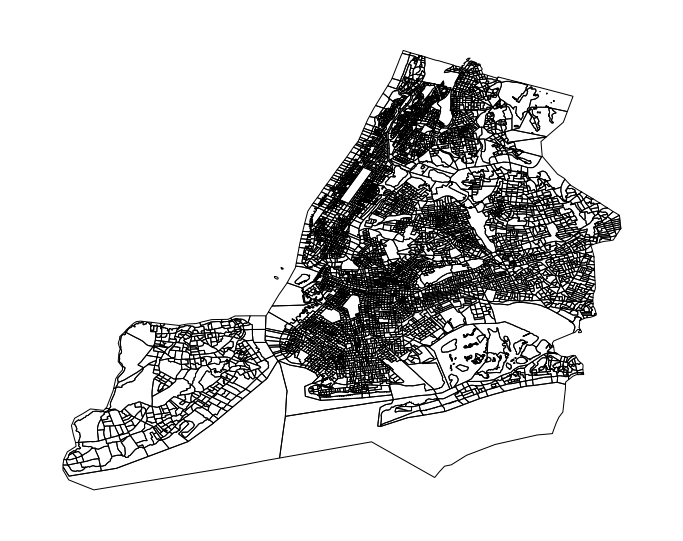

In [ ]:
geoplot.polyplot(gdf, figsize=(12, 12))


In [ ]:
gdf[gdf['pop_total'].astype(int)==0]

,cbg,StateFIPS,CountyFIPS,TractCode,BlockGroup,State,County,ClassCode,pop_total,amount_land,amount_water,latitude,longitude,person_per_sq_meter,person_per_sq_meter_sqrt,geometry
22,360470407001,36,047,040700,1,NY,Kings County,H6,0,506168,0,40.684294,-73.9012086,0.0,0.0,"MULTIPOLYGON (((-73.90543 40.68366, -73.90449 ..."
134,360470960001,36,047,096000,1,NY,Kings County,H6,0,423887,0,40.645927,-73.9147665,0.0,0.0,"MULTIPOLYGON (((-73.91995 40.64471, -73.91982 ..."
377,360470543001,36,047,054300,1,NY,Kings County,H6,0,956122,376700,40.7014969,-73.9716023,0.0,0.0,"MULTIPOLYGON (((-73.98065 40.70156, -73.98046 ..."
511,360470292000,36,047,029200,0,NY,Kings County,H6,0,0,91737,40.5941914,-74.0041112,0.0,0.0,"MULTIPOLYGON (((-74.00619 40.59436, -74.00412 ..."
539,360810655011,36,081,065501,1,NY,Queens County,H6,0,812085,0,40.7147523,-73.8666471,0.0,0.0,"MULTIPOLYGON (((-73.87239 40.71783, -73.87143 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6486,360850018000,36,085,001800,0,NY,Richmond County,H6,0,0,1451437,40.6017809,-74.0514542,0.0,0.0,"MULTIPOLYGON (((-74.05969 40.59408, -74.05356 ..."
6487,360850021000,36,085,002100,0,NY,Richmond County,H6,0,0,1547020,40.6317191,-74.0626755,0.0,0.0,"MULTIPOLYGON (((-74.06935 40.63810, -74.05623 ..."
6490,360850070000,36,085,007000,0,NY,Richmond County,H6,0,0,866081,40.5821041,-74.0677399,0.0,0.0,"MULTIPOLYGON (((-74.07382 40.58045, -74.06953 ..."
6491,360850074000,36,085,007400,0,NY,Richmond County,H6,0,0,442359,40.5893274,-74.0598735,0.0,0.0,"MULTIPOLYGON (((-74.06180 40.59235, -74.05969 ..."


In [ ]:
# Remove blocks with zero population
gdf = gdf[gdf['pop_total'].astype(int)!=0]
gdf

,cbg,StateFIPS,CountyFIPS,TractCode,BlockGroup,State,County,ClassCode,pop_total,amount_land,amount_water,latitude,longitude,person_per_sq_meter,person_per_sq_meter_sqrt,geometry
0,360050175002,36,005,017500,2,NY,Bronx County,H6,1110,23694,0,40.8296335,-73.9152037,0.046847,0.216442,"MULTIPOLYGON (((-73.91570 40.83054, -73.91485 ..."
1,360050141001,36,005,014100,1,NY,Bronx County,H6,1445,55934,0,40.8245444,-73.9131209,0.025834,0.160730,"MULTIPOLYGON (((-73.91661 40.82499, -73.91592 ..."
2,360050145001,36,005,014500,1,NY,Bronx County,H6,2003,47026,0,40.8309816,-73.905087,0.042593,0.206382,"MULTIPOLYGON (((-73.90584 40.83106, -73.90505 ..."
3,360050075002,36,005,007500,2,NY,Bronx County,H6,2731,109058,0,40.8202395,-73.9080678,0.025042,0.158246,"MULTIPOLYGON (((-73.91035 40.81995, -73.91022 ..."
4,360050418001,36,005,041800,1,NY,Bronx County,H6,936,140793,0,40.8989195,-73.8564428,0.006648,0.081536,"MULTIPOLYGON (((-73.86287 40.89515, -73.86146 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6483,360610193002,36,061,019300,2,NY,New York County,H6,1857,23202,0,40.7989998,-73.9602777,0.080036,0.282907,"MULTIPOLYGON (((-73.96098 40.79933, -73.96053 ..."
6484,360610201022,36,061,020102,2,NY,New York County,H6,1688,23295,0,40.8040731,-73.9565731,0.072462,0.269187,"MULTIPOLYGON (((-73.95732 40.80436, -73.95682 ..."
6485,360850007003,36,085,000700,3,NY,Richmond County,H6,1223,82853,0,40.6472879,-74.0840694,0.014761,0.121495,"MULTIPOLYGON (((-74.08742 40.64757, -74.08637 ..."
6488,360850040003,36,085,004000,3,NY,Richmond County,H6,2757,75183,0,40.6154497,-74.0827729,0.036671,0.191495,"MULTIPOLYGON (((-74.08465 40.61520, -74.08405 ..."


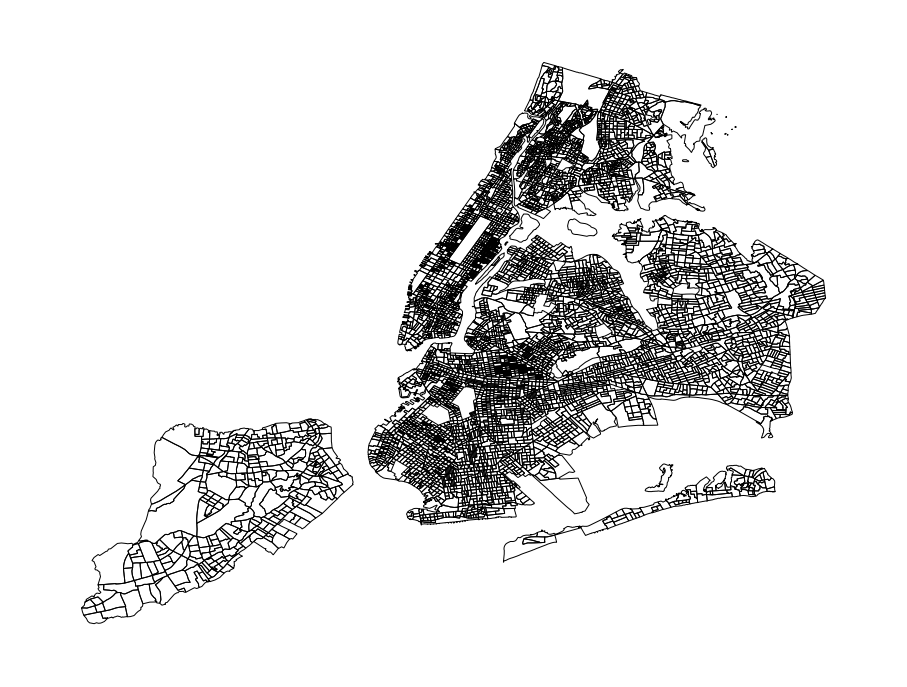

In [ ]:
geoplot.polyplot(gdf, figsize=(16,16))

In [ ]:
devices_mobility

,date,cbg,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,month,percentage_completely_home_deviation
1847850,2020-01-01 00:00:00+00:00,360810361001,105,35,2,1,33.333333,1.904762,0.952381,-0.333820,-0.903751,-0.982197,1,-0.858442
1850452,2020-01-01 00:00:00+00:00,360050227021,74,29,1,1,39.189189,1.351351,1.351351,0.078979,-1.018687,-0.889712,1,4.997414
1850451,2020-01-01 00:00:00+00:00,360811010012,201,87,2,3,43.283582,0.995025,1.492537,0.367607,-1.092691,-0.856984,1,9.091807
1850450,2020-01-01 00:00:00+00:00,360810667011,81,24,2,1,29.629630,2.469136,1.234568,-0.594907,-0.786538,-0.916783,1,-4.562145
1850449,2020-01-01 00:00:00+00:00,360610263004,61,21,1,1,34.426230,1.639344,1.639344,-0.256778,-0.958875,-0.822952,1,0.234455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211312,2020-12-31 00:00:00+00:00,360810457001,61,24,6,3,39.344262,9.836066,4.918033,0.089911,0.743473,-0.062923,12,5.152487
2211311,2020-12-31 00:00:00+00:00,360471014001,38,17,1,1,44.736842,2.631579,2.631579,0.470053,-0.752801,-0.592943,12,10.545067
2211310,2020-12-31 00:00:00+00:00,360470352001,36,14,1,1,38.888889,2.777778,2.777778,0.057810,-0.722437,-0.559053,12,4.697114
2211308,2020-12-31 00:00:00+00:00,360810972021,114,55,1,1,48.245614,0.877193,0.877193,0.717398,-1.117163,-0.999626,12,14.053839


In [ ]:
rolling_mobility = devices_mobility.rolling(10).mean()[9:]
rolling_mobility

,cbg,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,month,percentage_completely_home_deviation
1850444,3.605405e+11,91.3,35.6,1.5,1.5,37.935810,1.777200,1.747020,-0.009376,-0.930244,-0.797992,1.0,3.744035
1850453,3.604645e+11,85.3,33.9,1.4,1.5,38.602477,1.808946,1.874004,0.037620,-0.923650,-0.768556,1.0,4.410702
1850443,3.605066e+11,83.1,33.1,1.4,1.5,38.722019,1.866119,1.931177,0.046047,-0.911776,-0.755303,1.0,4.530244
1850441,3.604725e+11,67.8,25.8,1.3,1.3,37.310328,1.974950,1.990256,-0.053468,-0.889174,-0.741608,1.0,3.118553
1850440,3.604385e+11,65.7,26.4,1.4,1.4,39.347365,2.228036,2.200133,0.090130,-0.836611,-0.692957,1.0,5.155590
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211312,3.606163e+11,57.0,20.7,3.3,2.2,40.207078,6.721316,5.533395,0.150734,0.096582,0.079724,12.0,6.015303
2211311,3.606584e+11,56.4,20.2,3.0,2.2,39.680763,6.075383,5.569280,0.113632,-0.037570,0.088042,12.0,5.488988
2211310,3.606204e+11,45.5,16.6,2.2,2.0,40.121376,5.732471,5.640161,0.144692,-0.108788,0.104473,12.0,5.929601
2211308,3.606165e+11,53.9,20.1,1.9,1.6,38.279270,4.486857,4.061214,0.014836,-0.367485,-0.261541,12.0,4.087495


In [ ]:
rolling_mobility['percentage_completely_home_deviation'] = rolling_mobility['percentage_completely_home'] - stat_2019.loc['mean','percentage_completely_home']
rolling_mobility

,cbg,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,month,percentage_completely_home_deviation
1850444,3.605405e+11,91.3,35.6,1.5,1.5,37.935810,1.777200,1.747020,-0.009376,-0.930244,-0.797992,1.0,3.744035
1850453,3.604645e+11,85.3,33.9,1.4,1.5,38.602477,1.808946,1.874004,0.037620,-0.923650,-0.768556,1.0,4.410702
1850443,3.605066e+11,83.1,33.1,1.4,1.5,38.722019,1.866119,1.931177,0.046047,-0.911776,-0.755303,1.0,4.530244
1850441,3.604725e+11,67.8,25.8,1.3,1.3,37.310328,1.974950,1.990256,-0.053468,-0.889174,-0.741608,1.0,3.118553
1850440,3.604385e+11,65.7,26.4,1.4,1.4,39.347365,2.228036,2.200133,0.090130,-0.836611,-0.692957,1.0,5.155590
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211312,3.606163e+11,57.0,20.7,3.3,2.2,40.207078,6.721316,5.533395,0.150734,0.096582,0.079724,12.0,6.015303
2211311,3.606584e+11,56.4,20.2,3.0,2.2,39.680763,6.075383,5.569280,0.113632,-0.037570,0.088042,12.0,5.488988
2211310,3.606204e+11,45.5,16.6,2.2,2.0,40.121376,5.732471,5.640161,0.144692,-0.108788,0.104473,12.0,5.929601
2211308,3.606165e+11,53.9,20.1,1.9,1.6,38.279270,4.486857,4.061214,0.014836,-0.367485,-0.261541,12.0,4.087495


In [ ]:
count = 0
path = Path('drive/MyDrive/big-data-project/media/animate/athome/{}-time'.format(city_directory))
path.mkdir(parents=True, exist_ok=True)

In [ ]:
str(days[0]).split(' ')[0]

'2020-01-01'

In [ ]:

import matplotlib.pyplot as plt

# Turn interactive plotting off
plt.ioff()

import mapclassify
# For Each day select data, 
for day in tqdm(days):
  # setup new arrays to use
  # print(day)

  row = devices_mobility[devices_mobility['date']==day]
  merged_gdf = gdf.merge(row, how='inner', left_on='cbg', right_on='cbg')

  scheme = mapclassify.Quantiles(devices_mobility['percentage_completely_home_deviation'], k=10)

  fig, ax = plt.subplots(1, 1, figsize=(20,20))

  geoplot.choropleth(merged_gdf, hue=merged_gdf['percentage_completely_home_deviation'], 
                     edgecolor='white', linewidth=0.5,
                     scheme=scheme,
                     ax=ax, 
                     cmap='RdBu',
                     legend=True)
  
  fig.savefig(path/(str(day).split(' ')[0]+'.png'))
  plt.close(fig)



# Loop insert zeros for all empty rows
# merge all cbg with map, 
# create map visualization, 
# save image with frame number